In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin
import bmxobs
from matplotlib.colors import LogNorm
from plot_envelope7X2 import plot_envelope6X2
from getVisibilities import getVisibilities

In [13]:
dict_input = getVisibilities(DATADIR = '/gpfs/mnt/gpfs02/astro/workarea/bmxdata/reduced/pas', tag = '210626_0400')
plt.subplots(figsize = (15,10))
# print(dict_input)
plot_envelope6X2(dict_input)

ValueError: setting an array element with a sequence.

In [2]:
d1 = bmxobs.BMXObs("pas/210618_0500", channels="110,220,120")
d = bmxobs.BMXObs("pas/210603_0600", channels="110,220,120")
#d = bmxobs.BMXObs("pas/210603_0600", channels="all")

In [3]:
d2 = bmxobs.BMXObs("pas/210617_0500", channels="110,220,120")

In [4]:
d3 = bmxobs.BMXObs("pas/210615_0500", channels="110,220,120")

In [5]:
d4 = bmxobs.BMXObs("pas/210614_0500", channels="110,220,120")

In [6]:
d5 = bmxobs.BMXObs("pas/210613_0500", channels="110,220,120")

In [3]:
d6 = bmxobs.BMXObs("pas/210626_0400", channels="120, 580, 230, 560, 670, 680, 780")

In [8]:
print (d.mjd.min(), d.mjd.max())
print (d.ra.min(), d.ra.max()) # measured in radians
print (d.freq[0].min(), d.freq[1].max())

59368.25312109821 59369.41672554021
-1.570813 5.759556
1100.1343101114035 1422.4996643066406


In [4]:
# restrict frequencies
# cutfreq = d.freq[0][(d.freq[0]>1100) & (d.freq[0]<1500)]
cutfreq6 = d6.freq[0][(d6.freq[0]>1100) & (d6.freq[0]<1500)]

# right ascension and limits
ra_rad = 5.23 # right ascension of Cygnus A in radians - (19+59/60)/24*2*pi
lower_lim = ra_rad - .15    # .35 = 20 deg in radians
upper_lim = ra_rad + .15

# restrict the time
# cutra = d.ra[(d.ra > lower_lim) & (d.ra < upper_lim)]
# cutra1 = d1.ra[(d1.ra > lower_lim) & (d1.ra < upper_lim)]
# cutra2 = d2.ra[(d2.ra > lower_lim) & (d2.ra < upper_lim)]
# cutra3 = d3.ra[(d3.ra > lower_lim) & (d3.ra < upper_lim)]
# cutra4 = d4.ra[(d4.ra > lower_lim) & (d4.ra < upper_lim)]
# cutra5 = d5.ra[(d5.ra > lower_lim) & (d5.ra < upper_lim)]
cutra6 = d6.ra[(d6.ra > lower_lim) & (d6.ra < upper_lim)]

# cut data set
# ifstart =  np.where(d.freq[0]>1100)[0][0]
# ifend = np.where(d.freq[0]>1500)[0][0]
# itstart = np.where(d.ra>lower_lim)[0][0]
# itend = np.where(d.ra>upper_lim)[0][0]

# ifstart1 =  np.where(d1.freq[0]>1100)[0][0]
# ifend1 = np.where(d1.freq[0]>1500)[0][0]
# itstart1 = np.where(d1.ra>lower_lim)[0][0]
# itend1 = np.where(d1.ra>upper_lim)[0][0]

# ifstart2 =  np.where(d2.freq[0]>1100)[0][0]
# ifend2 = np.where(d2.freq[0]>1500)[0][0]
# itstart2 = np.where(d2.ra>lower_lim)[0][0]
# itend2 = np.where(d2.ra>upper_lim)[0][0]

# ifstart3 =  np.where(d3.freq[0]>1100)[0][0]
# ifend3 = np.where(d3.freq[0]>1500)[0][0]
# itstart3 = np.where(d3.ra>lower_lim)[0][0]
# itend3 = np.where(d3.ra>upper_lim)[0][0]

# ifstart4 =  np.where(d4.freq[0]>1100)[0][0]
# ifend4 = np.where(d4.freq[0]>1500)[0][0]
# itstart4 = np.where(d4.ra>lower_lim)[0][0]
# itend4 = np.where(d4.ra>upper_lim)[0][0]

# ifstart5 =  np.where(d5.freq[0]>1100)[0][0]
# ifend5 = np.where(d5.freq[0]>1500)[0][0]
# itstart5 = np.where(d5.ra>lower_lim)[0][0]
# itend5 = np.where(d5.ra>upper_lim)[0][0]

ifstart6 =  np.where(d6.freq[0]>1100)[0][0]
ifend6 = np.where(d6.freq[0]>1500)[0][0]
itstart6 = np.where(d6.ra>lower_lim)[0][0]
itend6 = np.where(d6.ra>upper_lim)[0][0]

In [5]:
# Cut data sets
# day 6 (21 06 03)
# cutdata110 = d[110][itstart:itend, ifstart:ifend]
# cutdata220 = d[220][itstart:itend, ifstart:ifend]

# cutdata120_real = np.real(d[120][itstart:itend, ifstart:ifend])
# cutdata120_abs = np.abs(d[120][itstart:itend, ifstart:ifend])
# cutdata120_phase = np.angle(d[120][itstart:itend, ifstart:ifend])
# cutdata120_i = np.imag(d[120][itstart:itend, ifstart:ifend])

# # day 1 (21 06 18) - have to edit g1 and g2
# cutdata1_110 = d1[110][itstart1:itend1, ifstart1:ifend1] * (.9 + 1*np.abs(ra_rad-5.4))**2
# cutdata1_220 = d1[220][itstart1:itend1, ifstart1:ifend1] * (.92 + 1*np.abs(ra_rad-5.4))**2


# cutdata1_120_real = np.real(d1[120][itstart1:itend1, ifstart1:ifend1])
# cutdata1_120_abs = np.abs(d1[120][itstart1:itend1, ifstart1:ifend1])
# cutdata1_120_phase = np.angle(d1[120][itstart1:itend1, ifstart1:ifend1])
# cutdata1_120_i = np.imag(d1[120][itstart1:itend1, ifstart1:ifend1]) 

# # day 2 (21 06 17)
# cutdata2_110 = d2[110][itstart2:itend2, ifstart2:ifend2] * (.85 +1*np.abs(ra_rad-5.4))**2
# cutdata2_220 = d2[220][itstart2:itend2, ifstart2:ifend2] * (.85 +1*np.abs(ra_rad-5.4))**2

# cutdata2_120_real = np.real(d2[120][itstart2:itend2, ifstart2:ifend2])
# cutdata2_120_abs = np.abs(d2[120][itstart2:itend2, ifstart2:ifend2])
# cutdata2_120_phase = np.angle(d2[120][itstart2:itend2, ifstart2:ifend2])
# cutdata2_120_i = np.imag(d2[120][itstart2:itend2, ifstart2:ifend2]) 

# # day 3 (21 06 15)
# cutdata3_110 = d3[110][itstart3:itend3, ifstart3:ifend3] * (.88 +1*np.abs(ra_rad-5.4))**2
# cutdata3_220 = d3[220][itstart3:itend3, ifstart3:ifend3] * (.91 +1*np.abs(ra_rad-5.4))**2

# cutdata3_120_real = np.real(d3[120][itstart3:itend3, ifstart3:ifend3])
# cutdata3_120_abs = np.abs(d3[120][itstart3:itend3, ifstart3:ifend3])
# cutdata3_120_phase = np.angle(d3[120][itstart3:itend3, ifstart3:ifend3])
# cutdata3_120_i = np.imag(d3[120][itstart3:itend3, ifstart2:ifend3])

# # day 4 (21 06 14)
# cutdata4_110 = d4[110][itstart4:itend4, ifstart4:ifend4] * (.89 +1*np.abs(ra_rad-5.4))**2
# cutdata4_220 = d4[220][itstart4:itend4, ifstart4:ifend4] * (.92 +1*np.abs(ra_rad-5.4))**2

# cutdata4_120_real = np.real(d4[120][itstart4:itend4, ifstart4:ifend4])
# cutdata4_120_abs = np.abs(d4[120][itstart4:itend4, ifstart4:ifend4])
# cutdata4_120_phase = np.angle(d4[120][itstart4:itend4, ifstart4:ifend4])
# cutdata4_120_i = np.imag(d4[120][itstart4:itend4, ifstart4:ifend4])

# # day 5 (21 06 13)
# cutdata5_110 = d5[110][itstart5:itend5, ifstart5:ifend5] * (.88 +1*np.abs(ra_rad-5.4))**2
# cutdata5_220 = d5[220][itstart5:itend5, ifstart5:ifend5] * (.91 +1*np.abs(ra_rad-5.4))**2

# cutdata5_120_real = np.real(d5[120][itstart5:itend5, ifstart5:ifend5])
# cutdata5_120_abs = np.abs(d5[120][itstart5:itend5, ifstart5:ifend5])
# cutdata5_120_phase = np.angle(d5[120][itstart5:itend5, ifstart5:ifend5])
# cutdata5_120_i = np.imag(d5[120][itstart5:itend5, ifstart5:ifend5])

# 21 06 26
# cutdata6_110 = d6[110][itstart6:itend6, ifstart6:ifend6] #* (.88 +1*np.abs(ra_rad-5.4))**2
# cutdata6_220 = d6[220][itstart6:itend6, ifstart6:ifend6] * (.9 +1*np.abs(ra_rad-5.4))**2

cutdata6_580 = d6[580][itstart6:itend6, ifstart6:ifend6]
cutdata6_230 = d6[230][itstart6:itend6, ifstart6:ifend6]
cutdata6_560 = d6[560][itstart6:itend6, ifstart6:ifend6]
cutdata6_670 = d6[670][itstart6:itend6, ifstart6:ifend6]
cutdata6_680 = d6[680][itstart6:itend6, ifstart6:ifend6]
cutdata6_780 = d6[780][itstart6:itend6, ifstart6:ifend6]

cutdata6_120_real = np.real(d6[120][itstart6:itend6, ifstart6:ifend6])
cutdata6_120_abs = np.abs(d6[120][itstart6:itend6, ifstart6:ifend6])
cutdata6_120_phase = np.angle(d6[120][itstart6:itend6, ifstart6:ifend6])
cutdata6_120_i = np.imag(d6[120][itstart6:itend6, ifstart6:ifend6])

# print(cutfreq6[1125])

/gpfs02/astro/packages/bacon/latest/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/gpfs02/astro/packages/bacon/latest/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/gpfs02/astro/packages/bacon/latest/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/gpfs02/astro/packages/bacon/latest/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/gpfs02/astro/packages/bacon/latest/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to rea

Text(0.5, 0.98, 'freq = 1105.505403265357')

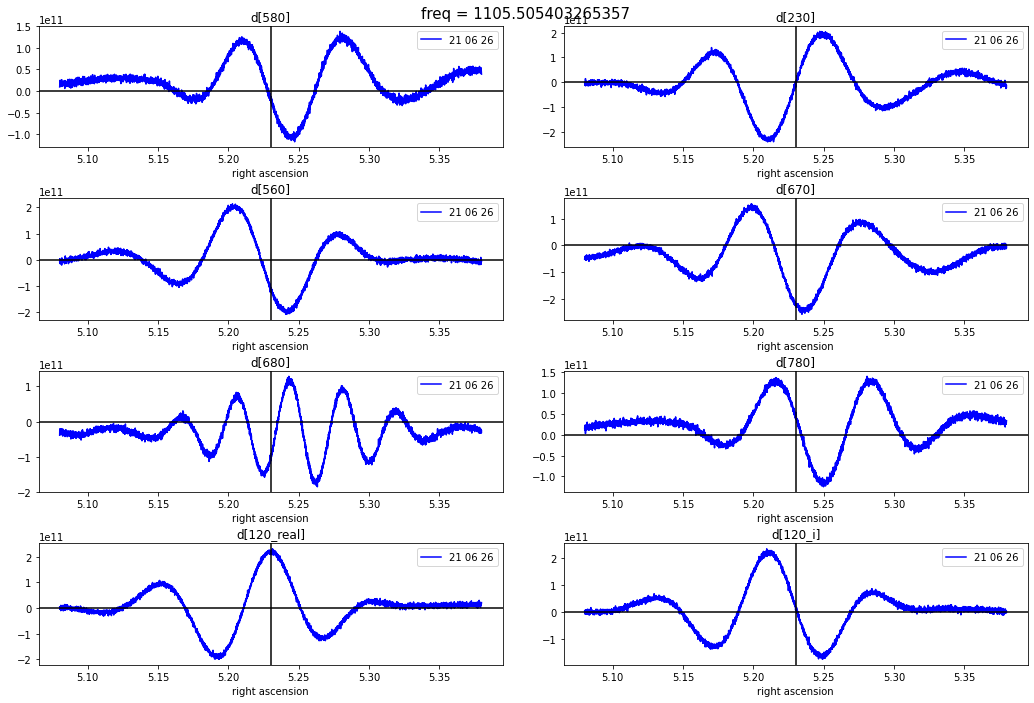

In [6]:
# Plotting
# for 1350 - 1600: [20] : freq 1355 | [186] : freq 1450 | [839] : freq 1575.47
# for 1100 - 1300: [20] : freq 1105
# for 1100 - 1500: [20] : freq 1105 | [775] : freq 1308.26 | [1304] : freq 1450.33
# data = np.array([[cutdata120_abs, cutdata120_phase], [cutdata120_real, cutdata120_i]])
# data1 = np.array([[cutdata1_120_abs, cutdata1_120_phase], [cutdata1_120_real, cutdata1_120_i]])
# data2 = np.array([[cutdata2_120_abs, cutdata2_120_phase], [cutdata2_120_real, cutdata2_120_i]])
# data3 = np.array([[cutdata3_120_abs, cutdata3_120_phase], [cutdata3_120_real, cutdata3_120_i]])
# data4 = np.array([[cutdata4_120_abs, cutdata4_120_phase], [cutdata4_120_real, cutdata4_120_i]])
# data5 = np.array([[cutdata5_120_abs, cutdata5_120_phase], [cutdata5_120_real, cutdata5_120_i]])

# data6 = np.array([[cutdata6_120_abs, cutdata6_120_phase], [cutdata6_120_real, cutdata6_120_i]])
data6 = np.array([[cutdata6_580, cutdata6_230], [cutdata6_560, cutdata6_670], [cutdata6_680, cutdata6_780],
                 [cutdata6_120_real, cutdata6_120_i]])

# ind = np.array([['120_abs', '120_phase'], ['120_real', '120_i']])
ind = np.array([[580, 230], [560, 670], [680, 780], ['120_real', '120_i']])

fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize=(15,10))
fig.tight_layout(pad = 3)

for row in range(4):
    for col in range(2):
#         axs[row][col].plot(cutra, data[row][col][:,20], label="21 06 03")
#         axs[row][col].plot(cutra1, data1[row][col][:,20], label="21 06 18")
#         axs[row][col].plot(cutra2, data2[row][col][:,20], label="21 06 17")
#         axs[row][col].plot(cutra3, data3[row][col][:,20], label="21 06 15")
#         axs[row][col].plot(cutra4, data4[row][col][:,20], label="21 06 14")
#         axs[row][col].plot(cutra5, data5[row][col][:,20], label="21 06 13")
        axs[row][col].plot(cutra6, data6[row][col][:,20], label="21 06 26", color = 'blue')
        
        
        axs[row][col].axvline(ra_rad, color = 'black')
        axs[row][col].axhline(0, color = 'black')
        axs[row][col].set_title('d[{}]'.format(ind[row][col]))
        axs[row][col].set_xlabel('right ascension')
        axs[row][col].legend()
        
plt.suptitle(f"freq = {cutfreq6[20]}", size = 15)

Text(0.5, 1.0, 'channel 120')

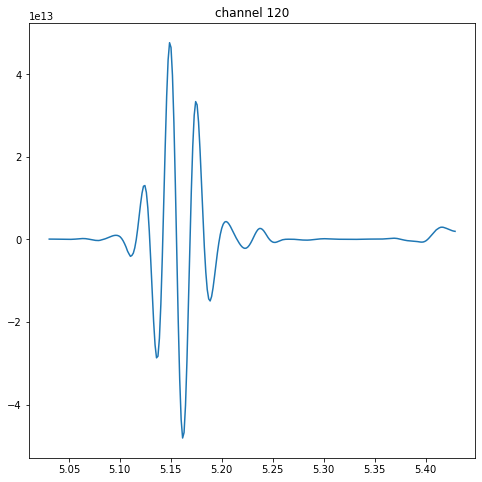

In [33]:
def get_cross_cut (D, fmin, fmax, ravg=10, ramin = 5.23-0.2, ramax=5.23+0.2, chan=120):
    freqcut = np.where((D.freq[0]>fmin) & (D.freq[0]<fmax))[0]
    data = D[chan][:,freqcut]
#     print(data[freqcut])
    # average in freq
    data = data.mean(axis=1)
    racut = np.where((D.ra>ramin) & (D.ra<=ramax))[0]
    racut = racut[:len(racut)//ravg*ravg]
    # average in ra
    data = data[racut]
    data=data.reshape((-1,ravg)).mean(axis=1)
    ra = D.ra[racut].reshape((-1,ravg)).mean(axis=1)
    ra = np.unique(ra, axis = 0)
    return ra,data

fig, axe = plt.subplots(1, figsize=(8,8))
ra, data = get_cross_cut(d6, 1100, 1200, ravg=20, ramin = 5.23-0.2, ramax=5.23+0.2, chan=120)
# ra1, data1 = get_cross_cut(d6, 1350, 1600, ravg=20, ramin = 5.23-0.2, ramax=5.23+0.2, chan=110)
# ra2, data2 = get_cross_cut(d6, 1350, 1600, ravg=20, ramin = 5.23-0.2, ramax=5.23+0.2, chan=220)

axe.plot(ra, np.real(data))
axe.set_title('channel 120')

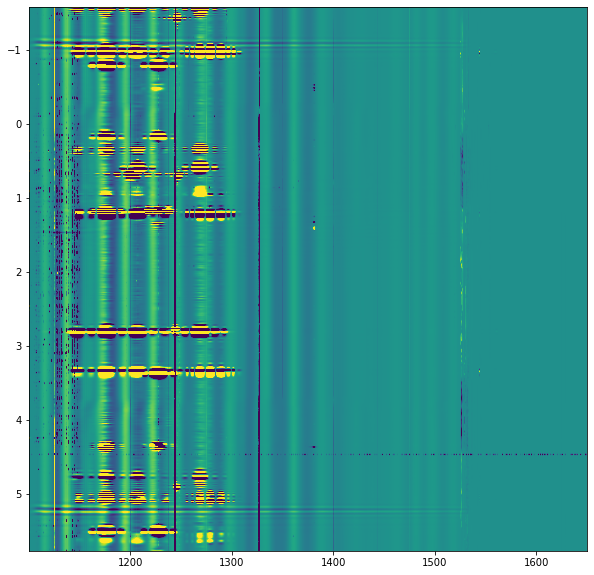

In [67]:
plt.figure(figsize=(10,10))
plt.imshow(np.real(d[120]),aspect='auto',vmin=-1e12,vmax=+1e12,extent=(d.freq[0].min(), d.freq[0].max(),
                                                                       d.ra.max(), d.ra.min()))

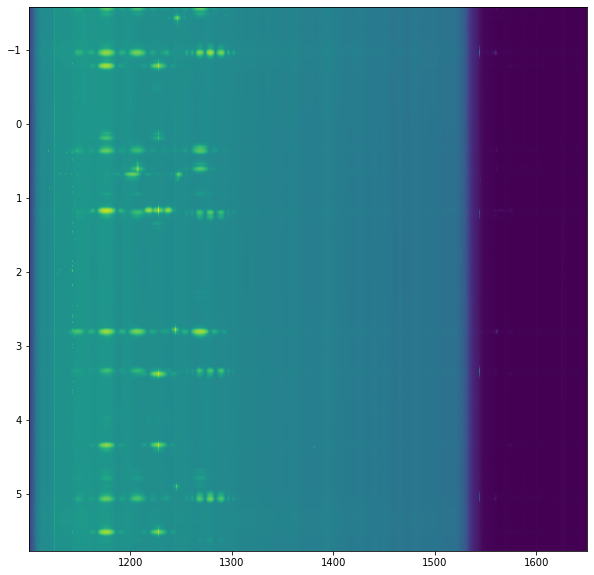

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(d[110],aspect='auto',norm=LogNorm(),extent=(d.freq[0].min(), d.freq[0].max(),d.ra.max(), d.ra.min()))

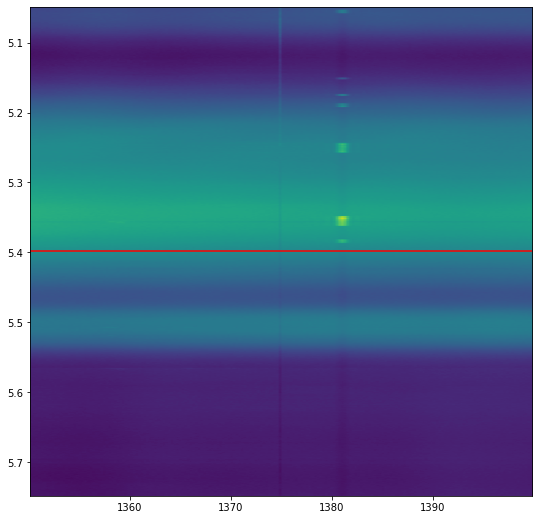

In [46]:
cutdata = d[110][itstart:itend, ifstart:ifend]
plt.figure(figsize=(9,9))
plt.axhline(ra_rad, color = 'red')
cutdata /= cutdata.mean(axis=0)[None,:]
plt.imshow(cutdata, aspect='auto',norm=LogNorm(),
           extent=(np.min(cutfreq), np.max(cutfreq), np.max(cutra), np.min(cutra)))